# **Linear Regression in Machine Learning**




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [5]:
data = pd.read_csv("data_for_lr.csv")
data = data.dropna()
training_input = np.array(data.x[0:500]).reshape(500,1)
training_output = np.array(data.y[0:500]).reshape(500,1)

test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [6]:
class LinearRegression:
    def __init__(self):
        self.parameter = {}
    def forward_propagation(self, training_input):
        m = self.parameter['m']
        c = self.parameter['c']
        predictions = np.multiply(m, training_input) + c
        return predictions
    def cost_function(self, training_output, predictions):
        const = np.mean((training_output-predictions)**2)
        return const
    def backward_propagation(self, training_input, training_output, predictions):
        derivaties = {}
        df = (predictions - training_output)
        dm = 2*np.mean(np.multiply(training_input, df))
        dc = 2*np.mean(df)
        derivaties['dm'] = dm
        derivaties['dc'] = dc
        return derivaties
    def update_parameters(self, derivaties, learning_rate):
        self.parameter['m'] = self.parameter['m'] - learning_rate*derivaties['dm']
        self.parameter['c'] = self.parameter['c'] - learning_rate*derivaties['dc']
    def train(self, training_input, training_output, learning_rate, iters):
        self.parameter['m'] = np.random.uniform(0, 1) * -1
        self.parameter['c'] = np.random.uniform(0, 1) * -1
        self.loss = []
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(training_input), max(training_input), 100)
        line, = ax.plot(x_vals, self.parameter['m']*x_vals+self.parameter['c'], color='red', label='Regression Line')
        ax.scatter(training_input, training_output, marker='o', color='green', label='Training data')
        ax.set_ylim(0, max(training_output)+1)
        def update(frame):
            predictions = self.forward_propagation(training_input)
            cost = self.cost_function(predictions, training_output)
            derivaties = self.backward_propagation(training_input, training_output, predictions)
            self.update_parameters(derivaties, learning_rate)
            line.set_ydata(self.parameter['m']*x_vals + self.parameter['c'])
            self.loss.append(cost)
            print("Interation = {}, Loss={}".format(frame+1, cost))
            return line,
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
        ani.save('linear_regression_A.png', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 
        return self.parameter, self.loss
    

MovieWriter ffmpeg unavailable; using Pillow instead.


Interation = 1, Loss=10107.138121577445
Interation = 1, Loss=1224.9404566878798
Interation = 1, Loss=154.538971855123
Interation = 1, Loss=25.543939873803378
Interation = 2, Loss=9.99863047175544
Interation = 3, Loss=8.125247276164453
Interation = 4, Loss=7.899479975859567
Interation = 5, Loss=7.872268321814026
Interation = 6, Loss=7.868984784384048
Interation = 7, Loss=7.868584845834759
Interation = 8, Loss=7.868532412758643
Interation = 9, Loss=7.868521858300601
Interation = 10, Loss=7.868516351098513
Interation = 11, Loss=7.868511452572379
Interation = 12, Loss=7.868506627824967
Interation = 13, Loss=7.86850181239529
Interation = 14, Loss=7.868496998515055
Interation = 15, Loss=7.868492185248059
Interation = 16, Loss=7.868487372481433
Interation = 17, Loss=7.868482560201537
Interation = 18, Loss=7.868477748406677
Interation = 19, Loss=7.868472937096612
Interation = 20, Loss=7.8684681262712655
Interation = 21, Loss=7.86846331593059
Interation = 22, Loss=7.868458506074532
Interation =

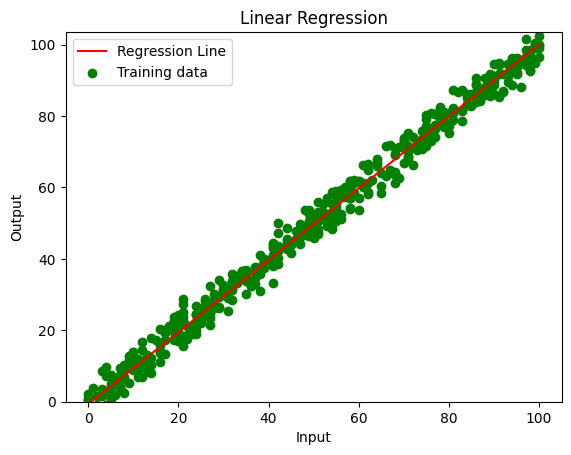

In [7]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(training_input, training_output, 0.0001, 100)

